In [ ]:
import requests
import json
import os
import pandas as pd
import time
import matplotlib.pyplot as plt
from screeninfo import get_monitors
import requests

from tqdm import tqdm
import os
import requests
import json

mplstyle_url = "https://gitlab.com/Grommi/mplstyle/-/raw/main/mjr_dark.mplstyle?ref_type=heads"
response = requests.get(mplstyle_url)
with open('mjr_dark.mplstyle', 'wb') as f:
    f.write(response.content)
plt.style.use(['mjr_dark.mplstyle'])
for m in get_monitors():
    print(m)
    if m.is_primary:
    # small screen 286mm
        if m.width_mm == 286:
            print("Laptop")
            plt.rcParams["figure.figsize"] = (9,5)
        else:
            print("Another Monitor")
            plt.rcParams["figure.figsize"] = (8,4)

%load_ext autoreload
%autoreload 2
# Directory containing the JSON files
data_dir = 'data'
incidents_dir = 'data/incidents'

Monitor(x=434, y=2160, width=2736, height=1824, width_mm=260, height_mm=173, name='\\\\.\\DISPLAY1', is_primary=False)
Monitor(x=0, y=0, width=3840, height=2160, width_mm=621, height_mm=341, name='\\\\.\\DISPLAY2', is_primary=True)
Another Monitor
Monitor(x=3840, y=225, width=1080, height=1920, width_mm=296, height_mm=527, name='\\\\.\\DISPLAY3', is_primary=False)


In [ ]:
# download summaries of specified seasons
season_starts = [2024]
for season_start in season_starts:
    url = f"https://lawis.at/lawis_api/v2_3/incident/?startDate={season_start}-09-01&endDate={season_start + 1}-09-01&_=1740497482175"
    page = requests.get(url)
    data = page.content
    os.makedirs("data", exist_ok=True)
    with open(f"data/lawis_{season_start}_{season_start + 1}.json", "wb") as f:
        f.write(data)
    time.sleep(1)

In [58]:
# Load all lawis season summaries
dfs = []

# Loop through each file in the directory
for file_name in os.listdir(data_dir):
    if file_name.endswith('.json'):
        file_path = os.path.join(data_dir, file_name)
        with open(file_path, 'r') as f:
            data = json.load(f)
            df = pd.json_normalize(data)
            dfs.append(df)

# Concatenate all DataFrames into one
df_seasons = pd.concat(dfs, ignore_index=True)
df_seasons


C:\Users\magge\AppData\Local\Temp\ipykernel_25296\804762855.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_seasons = pd.concat(dfs, ignore_index=True)


,incident_id,datum,country_id,region_id,subregion_id,ort,elevation,latitude,longitude,incline,aspect_id,danger_id,n_injured,n_dead,n_uninjured,involved_sum,involved,valid_time,revision
0,6745,1992-12-12 00:00:00,1,1,160,Hafelekar - Diretissima,2200.0,47.395000,11.260000,NaN,6.0,NaN,1.0,0.0,NaN,NaN,yes,True,1
1,6746,1993-01-27 00:00:00,1,1,167,Moostal - Rendlgebiet,2000.0,47.104665,10.263416,40.0,7.0,4.0,0.0,2.0,NaN,NaN,yes,True,1
2,6747,1993-01-31 00:00:00,1,1,172,Hochtennboden - Schigeb. Axamer Lizum,2350.0,47.174721,11.287931,35.0,3.0,4.0,0.0,1.0,NaN,NaN,yes,True,1
3,6748,1993-02-21 00:00:00,1,1,175,Aschau - Spiessnägel,1700.0,47.359404,12.306106,NaN,2.0,5.0,0.0,1.0,NaN,NaN,yes,True,1
4,6749,1993-02-21 00:00:00,1,1,158,Neunerköpfle - Usseralpe,1862.0,47.483574,10.540690,45.0,8.0,5.0,0.0,1.0,NaN,NaN,yes,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446,11171,2025-04-12 10:30:00,1,1,305,Große Seekarspitze,2540.0,47.406320,11.399810,40.0,1.0,2.0,0.0,0.0,NaN,NaN,yes,True,2
4447,11040,2025-01-19 10:00:00,1,6,266,Trickl,1600.0,47.538130,13.312920,30.0,1.0,2.0,0.0,0.0,1.0,1.0,yes,True,4
4448,11178,2025-05-25 17:00:00,1,6,274,Mooserboden/Höhenburg,2100.0,47.170130,12.722910,NaN,9.0,7.0,1.0,0.0,0.0,1.0,yes,True,1
4449,11179,2025-06-01 10:00:00,1,5,140,"Dachstein, Türlspitz",2600.0,47.461570,13.635060,40.0,5.0,7.0,0.0,0.0,1.0,1.0,yes,True,1


In [ ]:
# Download all incidents
incidents_dir = 'data/incidents'
os.makedirs(incidents_dir, exist_ok=True)

# Loop through each incident_id in the DataFrame
for incident_id in tqdm(df_seasons.incident_id, desc="Downloading incidents"):
    path = f"{incidents_dir}/{incident_id}.json"
    if not os.path.exists(path):
        url = f"https://lawis.at/lawis_api/public/incident/{incident_id}"
        response = requests.get(url)
        response.encoding = "utf-8"
        data = response.json()
        with open(path, "w", encoding='utf-8') as f:
            f.write(json.dumps(data, indent=2, ensure_ascii=False))

In [ ]:
# Load all lawis incidents from disk and write to CSV
dfis = []

# Loop through each file in the directory
for file_name in tqdm(os.listdir(incidents_dir), desc="Loading incidents"):
    if file_name.endswith('.json'):
        file_path = os.path.join(incidents_dir, file_name)
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            dfi = pd.json_normalize(data)
            dfis.append(dfi)

# Concatenate all DataFrames into one
dfi = pd.concat(dfis, ignore_index=True)
dfi.to_csv('data/lawis_incidents_all.csv', index=False, encoding='utf-8')
dfi

Loading incidents: 100%|██████████| 4452/4452 [00:06<00:00, 731.93it/s]


,id,valid_time,images,date,reported.date,reported.name,reported.email,involved.dead,involved.injured,involved.uninjured,...,location.country.id,location.country.code,location.country.text,location.region.id,location.region.text,location.subregion.id,location.subregion.text,involved.equipment,comments,not_buried
0,10000,True,[http://localhost/lawis_api/v2_3/files/inciden...,2021-01-15T08:58:00+01:00,2021-01-15T16:12:51+01:00,Patrick Gams,pats.gams@gmail.com,0,0,0,...,1,AT,Österreich,5,Steiermark,146,Südl. Wölzer Tauern,NaN,NaN,NaN
1,10001,True,NaN,2021-01-14T14:30:00+01:00,2021-01-15T17:09:43+01:00,Stifter Florian,lawinenwarndienst.post@ooe.gv.at,0,1,1,...,1,AT,Österreich,7,Oberösterreich,253,Nordalpen,NaN,NaN,NaN
2,10002,True,NaN,2021-01-15T12:00:00+01:00,2021-01-16T08:13:46+01:00,Arnold Studeregger,arnold.studeregger@zamg.ac.at,0,0,0,...,1,AT,Österreich,5,Steiermark,148,Eisenerzer Alpen,[],NaN,NaN
3,10003,True,NaN,2021-01-15T11:00:00+01:00,2021-01-16T08:15:57+01:00,Arnold Studeregger,arnold.studeregger@zamg.ac.at,0,0,0,...,1,AT,Österreich,5,Steiermark,148,Eisenerzer Alpen,NaN,NaN,NaN
4,10004,True,[http://localhost/lawis_api/v2_3/files/inciden...,2021-01-15T12:00:00+01:00,2021-01-16T09:13:53+01:00,Sedlak,slp@hzs.sk,0,0,2,...,12,SK,Slovensko,38,Slovensko,58,Slovensko,NaN,vystup troch skialpinistov zo Skalnateho plesa...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,9988,True,[http://localhost/lawis_api/v2_3/files/inciden...,2020-12-31T11:28:00+01:00,2021-01-12T16:48:59+01:00,Thomas Aigner,thomas.aigner1@stud.sbg.ac.at,0,0,0,...,1,AT,Österreich,6,Salzburg,90,Niedere Tauern,NaN,Fernauslösung über wenige Meter während wenige...,NaN
4448,9989,True,NaN,2021-01-11T14:00:00+01:00,2021-01-13T10:00:09+01:00,LWD Tirol,lawine@tirol.gv.at,0,0,1,...,1,AT,Österreich,1,Tirol,180,Nördl. Zillertaler Alpen,NaN,Meldung der Leitstelle - derzeit noch keine nä...,NaN
4449,9996,True,NaN,2021-01-15T10:58:00+01:00,2021-01-15T11:22:35+01:00,LWD Tirol,lawine@tirol.gv.at,0,0,1,...,1,AT,Österreich,1,Tirol,172,Nördl. Ötztaler- & Stubaier Alpen,NaN,NaN,NaN
4450,9997,True,NaN,2021-01-15T13:40:00+01:00,2021-01-15T15:50:39+01:00,LWD Steiermark,lawine@lawine-steiermark.at,1,1,0,...,1,AT,Österreich,5,Steiermark,146,Südl. Wölzer Tauern,[],Gesamtes Triebschneepaket auf Altschnee abgega...,NaN


In [72]:
# Load all incident details from CSV
df = pd.read_csv('data/lawis_incidents_all.csv', encoding='utf-8')
df = dfi[[
    'id',
    'date',
    'involved.dead',
    'involved.injured',
    'involved.uninjured',
    'involved.sweeped',
    'involved.buried_partial',
    'involved.buried_total',
    'involved.ascent_descent.text',
    'danger.rating.id',
    'avalanche.extent.length',
    'avalanche.extent.width',
    'avalanche.breakheight',
    'avalanche.type.text',
    'avalanche.size.text',
    'avalanche.release.text',
    'avalanche.humidity.text',
    'location.elevation',
    'location.longitude',
    'location.latitude',
    'location.slope_angle',
    'location.aspect.id',
]]
df = df.rename(columns={
    'involved.dead': 'dead',
    'involved.injured': 'injured',
    'involved.uninjured': 'uninjured',
    'involved.sweeped': 'sweeped',
    'involved.buried_partial': 'buried_partial',
    'involved.buried_total': 'buried_total',
    'involved.ascent_descent.text': 'ascent_descent',
    'danger.rating.id': 'danger_id',
    'avalanche.extent.length': 'length',
    'avalanche.extent.width': 'width',
    'avalanche.breakheight': 'slab_height',
    'avalanche.type.text': 'avalanche_type',
    'avalanche.size.text': 'size',
    'avalanche.release.text': 'release',
    'avalanche.humidity.text': 'humidity',
    'location.elevation': 'elevation',
    'location.longitude': 'longitude',
    'location.latitude': 'latitude',
    'location.slope_angle': 'slope_angle',
    'location.aspect.id': 'aspect',
})

df.to_csv('data/lawis_incidents.csv', index=False, encoding='utf-8')
# df.date = pd.to_datetime(df['date'])
df

,id,date,dead,injured,uninjured,sweeped,buried_partial,buried_total,ascent_descent,danger_id,...,slab_height,avalanche_type,size,release,humidity,elevation,longitude,latitude,slope_angle,aspect
0,10000,2021-01-15T08:58:00+01:00,0,0,0,0,0,0,ascent,3,...,100,slab,1: small avalanche,unknown,dry,2025.0,14.32961,47.26257,30.0,4.0
1,10001,2021-01-14T14:30:00+01:00,0,1,1,2,1,1,ascent,3,...,None,slab,unknown,NaN,unknown,1580.0,14.28506,47.64233,30.0,8.0
2,10002,2021-01-15T12:00:00+01:00,0,0,0,0,0,0,descent,3,...,None,slab,unknown,artificial,NaN,1700.0,14.82266,47.48985,35.0,2.0
3,10003,2021-01-15T11:00:00+01:00,0,0,0,0,0,0,unknown,3,...,None,slab,unknown,artificial,dry,1900.0,14.85188,47.48853,30.0,8.0
4,10004,2021-01-15T12:00:00+01:00,0,0,2,2,0,2,ascent,3,...,50,slab,1: small avalanche,artificial,dry,2190.0,20.21776,49.18796,39.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,9988,2020-12-31T11:28:00+01:00,0,0,0,0,0,0,descent,3,...,10,slab,1: small avalanche,artificial,dry,2056.0,13.47404,47.23459,33.0,8.0
4448,9989,2021-01-11T14:00:00+01:00,0,0,1,0,0,0,unknown,2,...,None,slab,2: medium avalanche,artificial,dry,3100.0,11.63086,47.02469,35.0,4.0
4449,9996,2021-01-15T10:58:00+01:00,0,0,1,0,0,0,descent,4,...,70,slab,2: medium avalanche,artificial,dry,2000.0,11.28543,47.19600,38.0,3.0
4450,9997,2021-01-15T13:40:00+01:00,1,1,0,0,0,0,NaN,3,...,None,slab,3: large avalanche,artificial,dry,2150.0,14.15511,47.23573,35.0,3.0


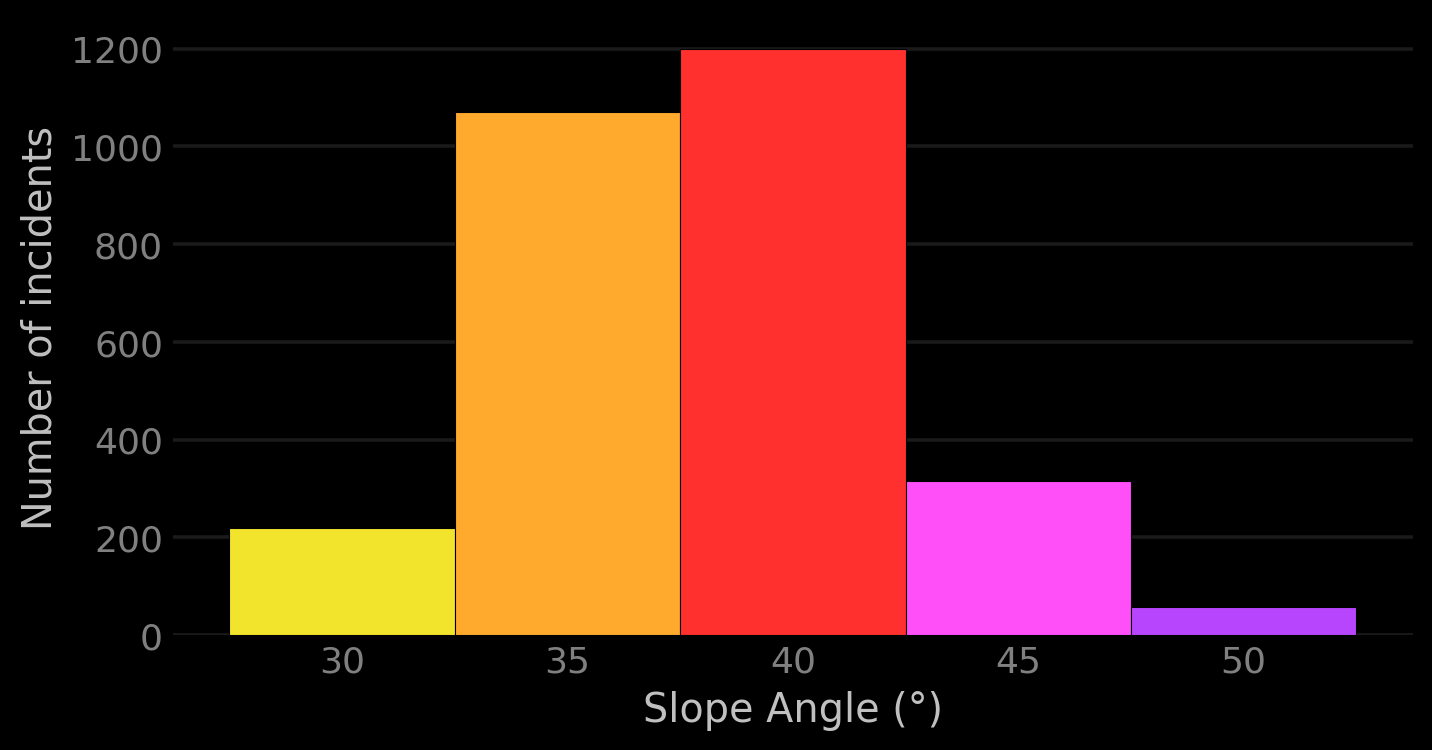

In [61]:
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(df.slope_angle, bins=[v - 2.5 for v in range(30, 60, 5)], edgecolor='black')
# df[df.involved_sum > 0].incline.hist(bins=[v - 2.5 for v in range(30, 60, 5)], ax=ax)
color_danger = ["#cbd859", "#f1e60d", "#f49717", "#e51c20", "black"]
colors = ["#4de54b", "#f2e42c", "#ffa92d", "#ff302d", "#ff4ff9", "#b745fd"]
ax.set(xlabel='Slope Angle (°)', ylabel='Number of incidents')
for patch, color in zip(patches, colors[1:]):
    patch.set_facecolor(color)




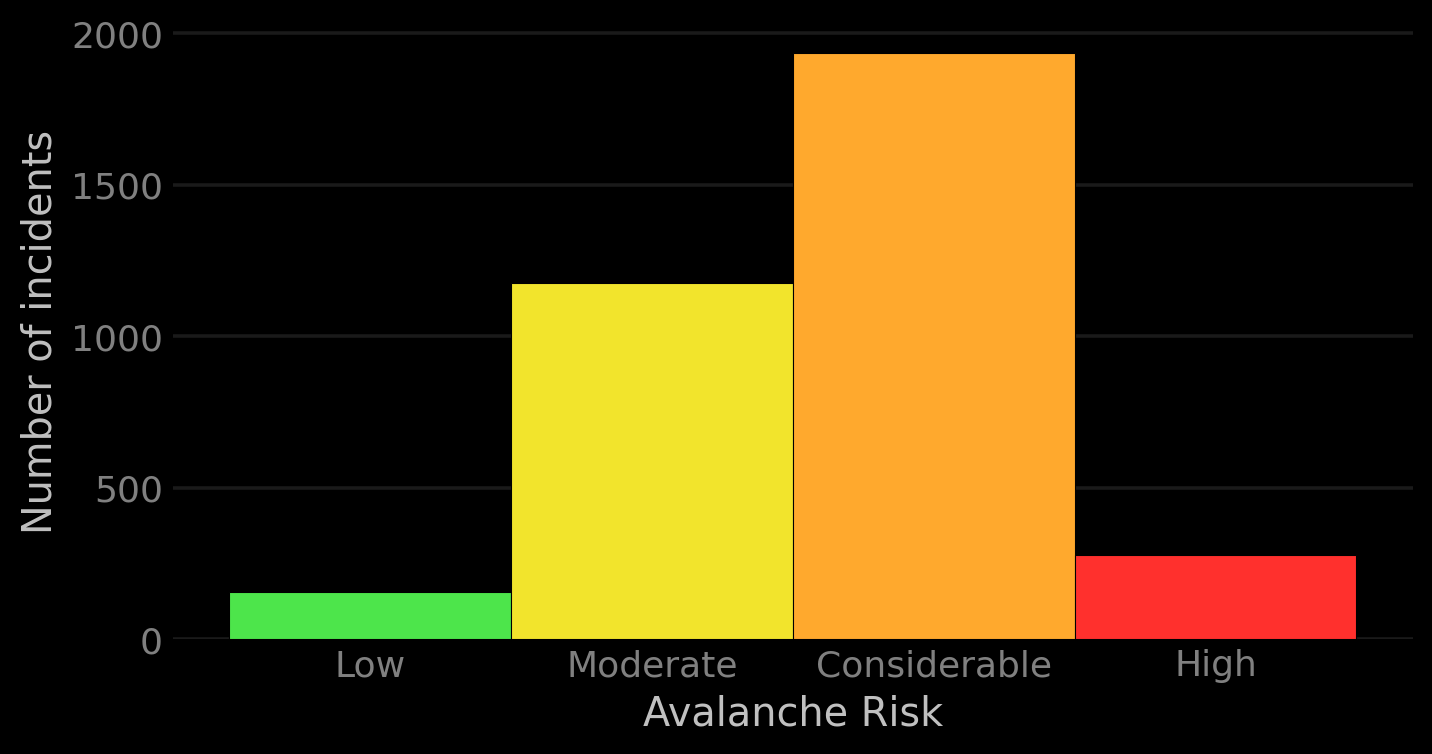

In [62]:
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(df.danger_id[(df.danger_id < 6)],bins=[v - .5 for v in range(1, 6)], edgecolor='black', density=False)
ax.set(xlabel='Avalanche Risk', ylabel='Number of incidents', xticks=range(1, 5), xticklabels=['Low', 'Moderate', 'Considerable', 'High'])
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

<Axes: xlabel='Elevation (m)', ylabel='Relative number of Incidents'>

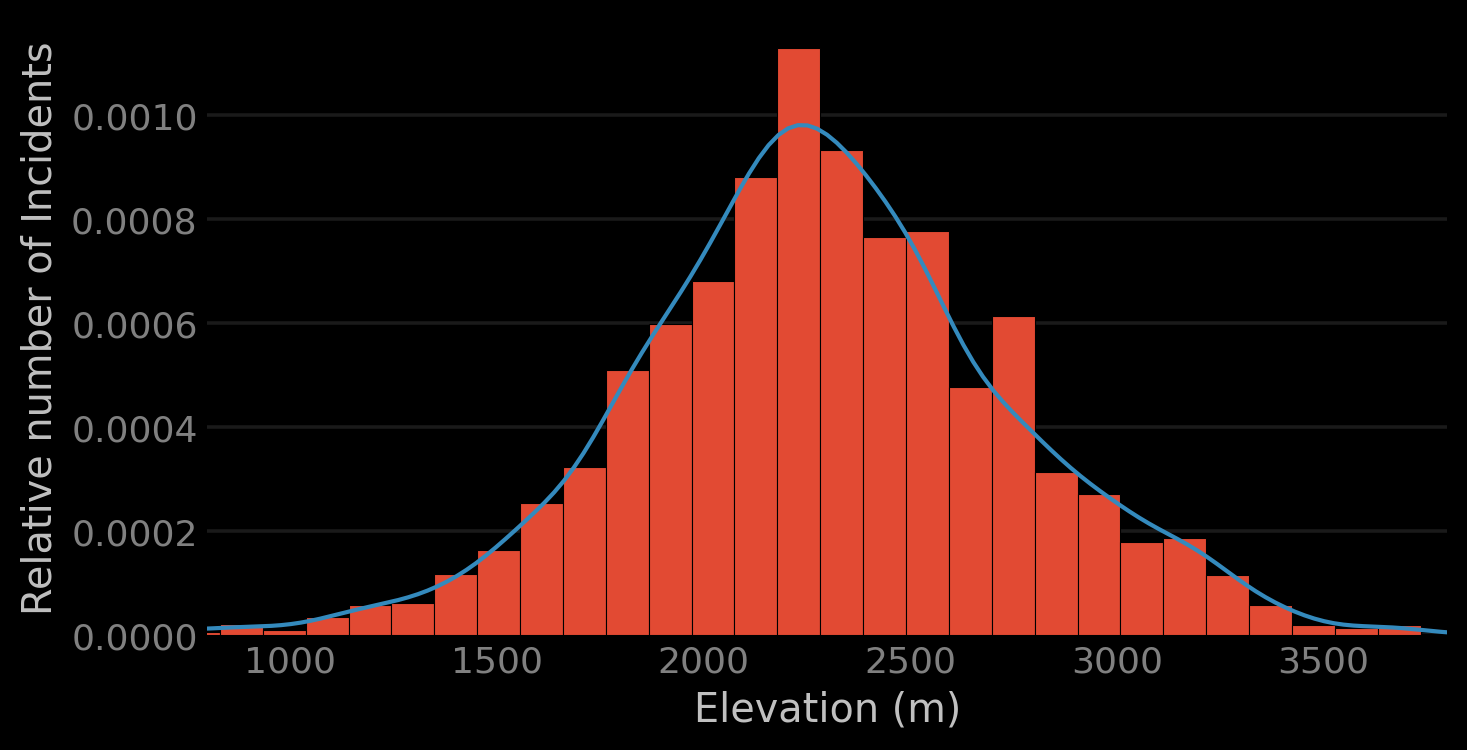

In [63]:
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(df.elevation, edgecolor='black', bins=40, density=True)
ax.set(xlabel='Elevation (m)', ylabel='Relative number of Incidents', xlim=(800, 3800))
import seaborn as sns
sns.kdeplot(df.elevation, bw_adjust=1, fill=False, ax=ax)

[Text(0.5, 0, 'Width (m)'), Text(0, 0.5, 'Number of Incidents')]

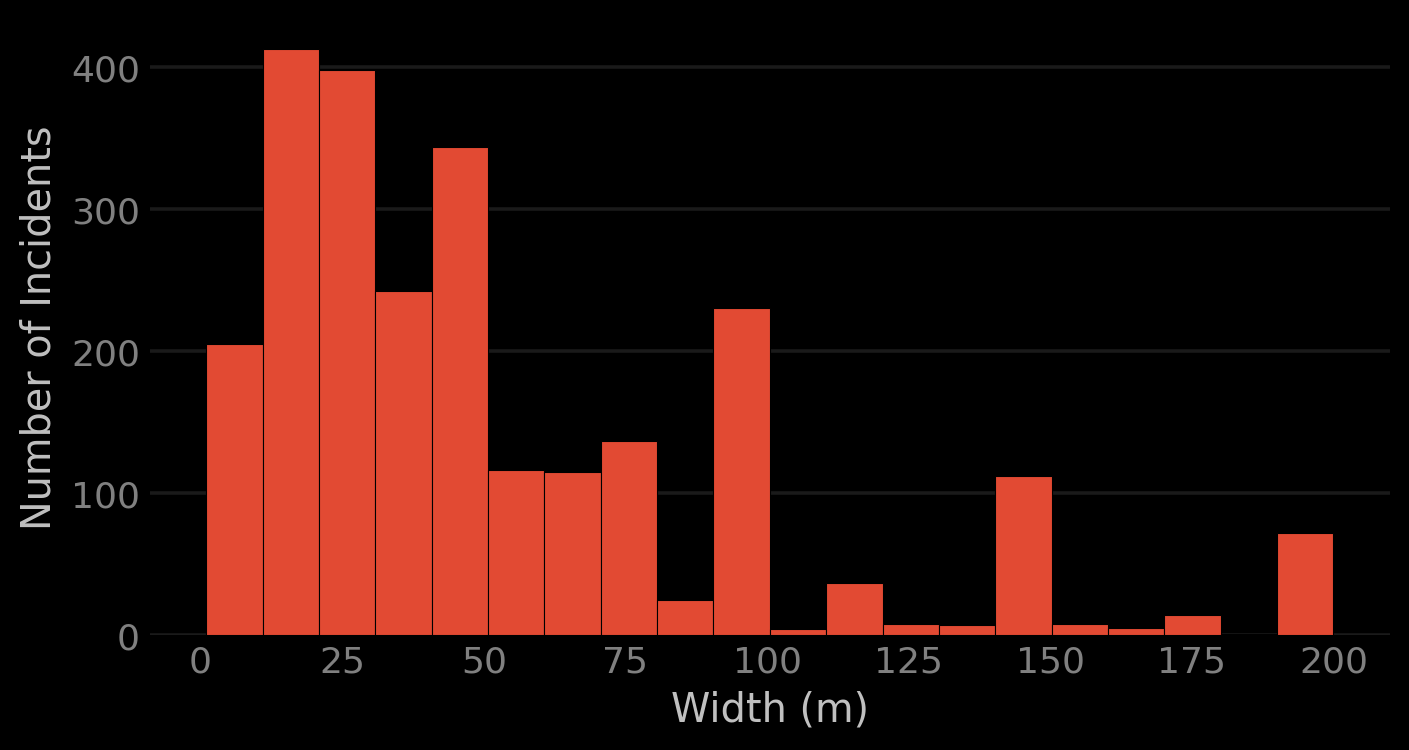

In [70]:
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(df.width[df.width <= 200], edgecolor='black', density=False, bins=20)
ax.set(xlabel='Width (m)', ylabel='Number of Incidents')


[Text(0.5, 0, 'Length (m)'), Text(0, 0.5, 'Number of Incidents')]

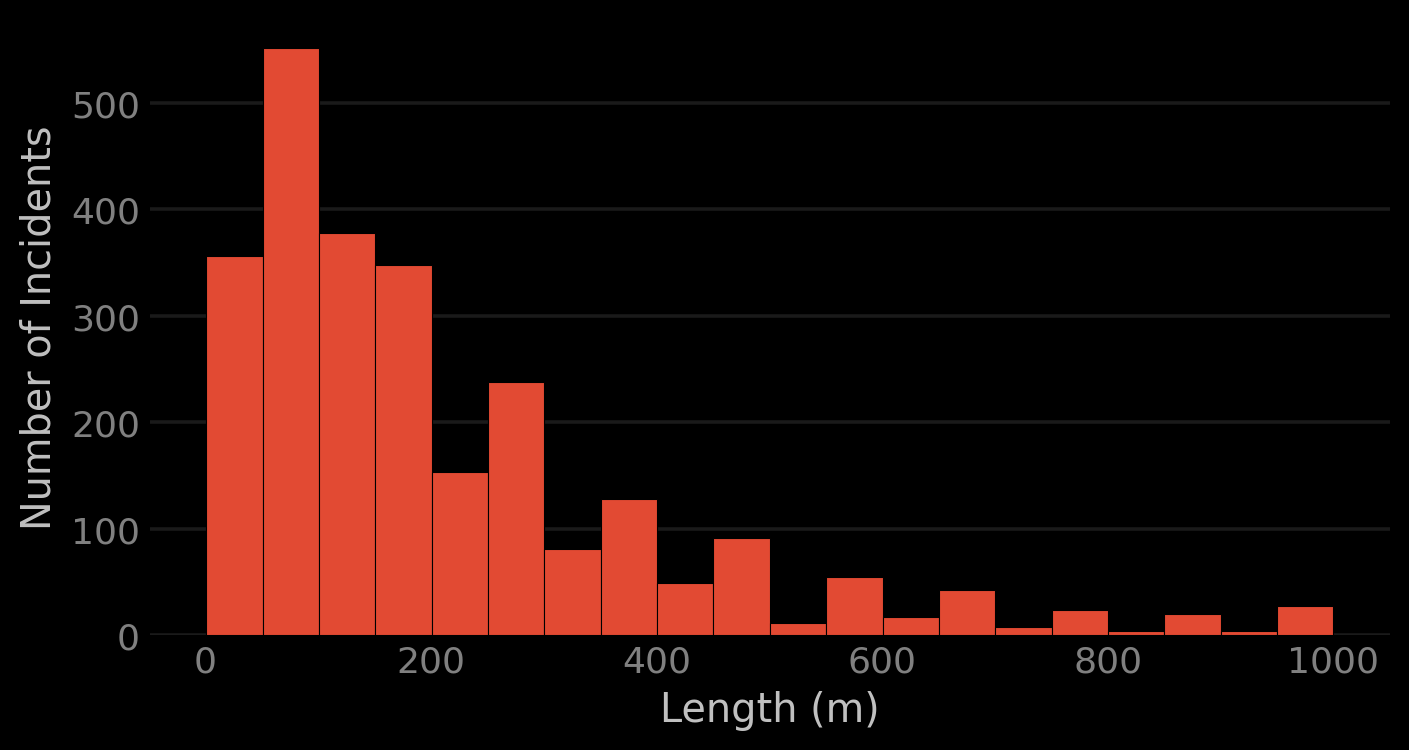

In [65]:
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(df.length[df.length <= 1000], edgecolor='black', density=False, bins=20)
ax.set(xlabel='Length (m)', ylabel='Number of Incidents')


[Text(0.5, 0, 'Slab Height (m)'), Text(0, 0.5, 'Number of Incidents')]

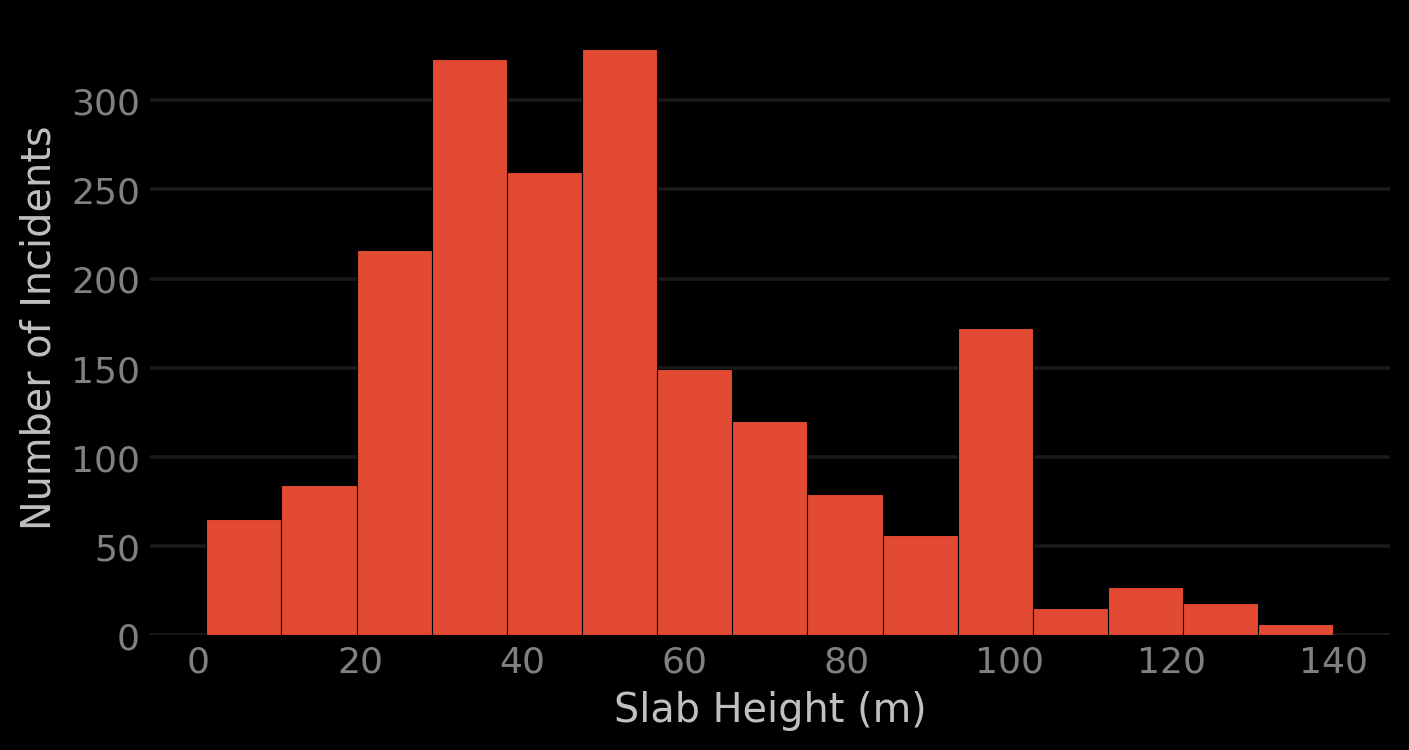

In [66]:
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(df.slab_height[df.slab_height < 150], edgecolor='black', density=False, bins=15)
ax.set(xlabel='Slab Height (m)', ylabel='Number of Incidents')


C:\Users\magge\AppData\Local\Temp\ipykernel_25296\804537403.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(aspect_id_to_text)


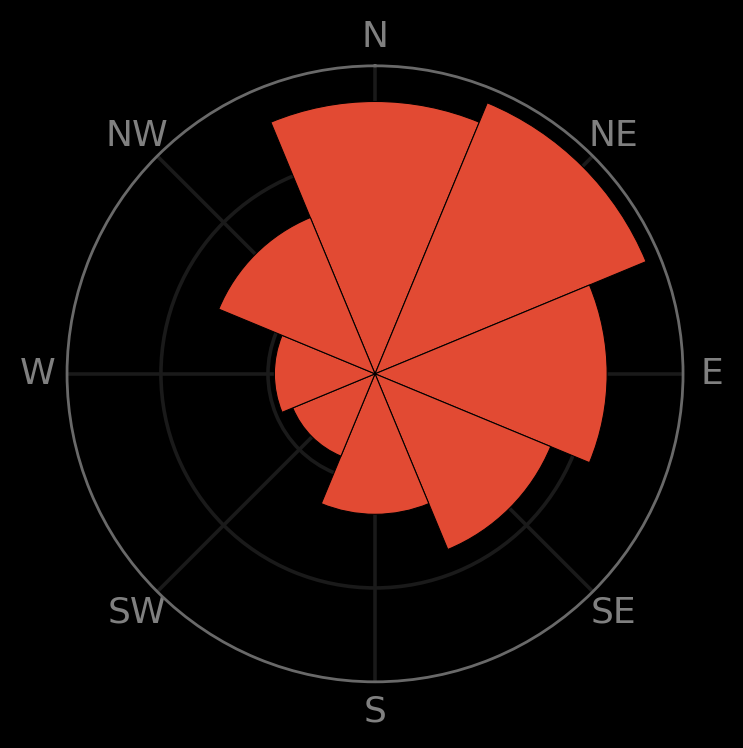

In [67]:
import numpy as np
aspect_id_to_text = ["N", "NE", "E", "SE", "S", "SW", "W", "NW"]
theta = np.linspace(0.0, 2 * np.pi, 8, endpoint=False)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.bar(theta, df.aspect[df.aspect < 9].value_counts().sort_index().values, width=np.pi/4,edgecolor='black')
ax.set_xticklabels(aspect_id_to_text)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_yticks([250, 500])

[(9.47996951665, 16.9796667823), (46.4318173285, 48.0)]

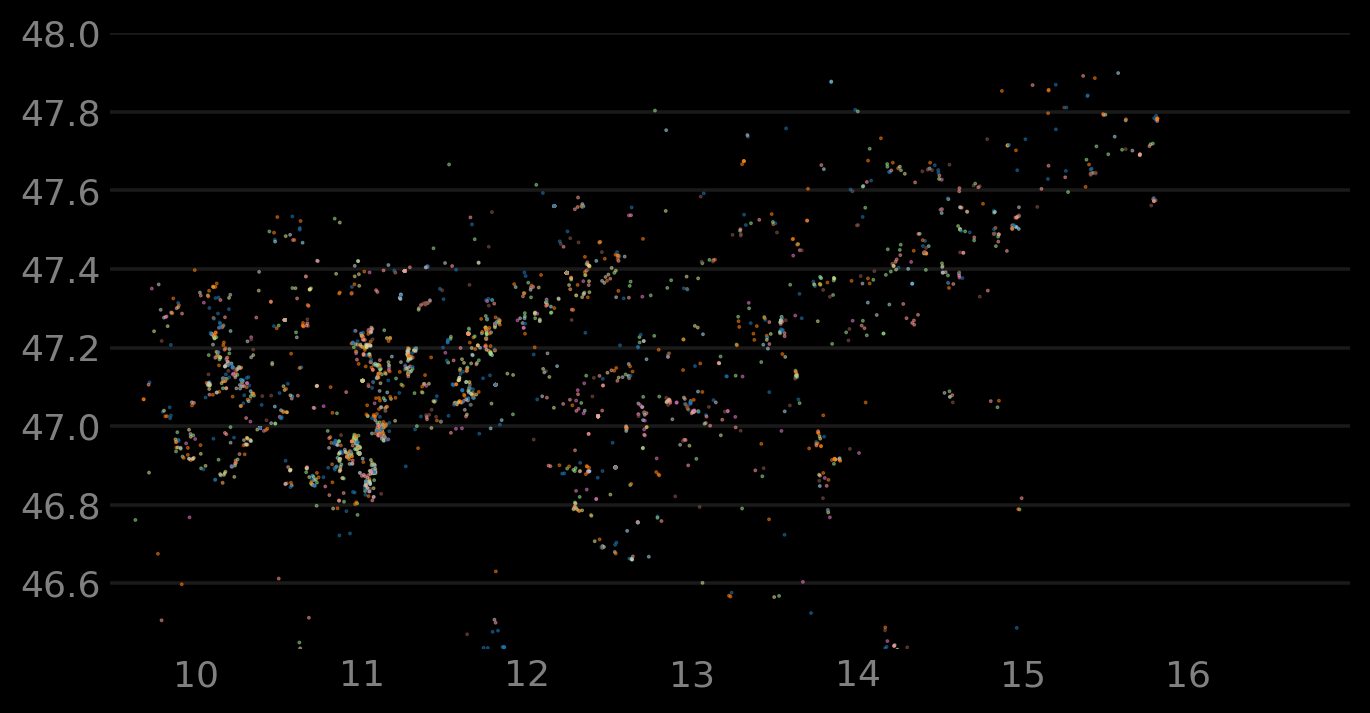

In [68]:
fig, ax = plt.subplots()
ax.scatter(df.longitude, df.latitude, s=1, c=df.aspect, cmap='tab20', alpha=0.5)
ax.set(xlim=(9.47996951665, 16.9796667823), ylim=(46.4318173285, 48))

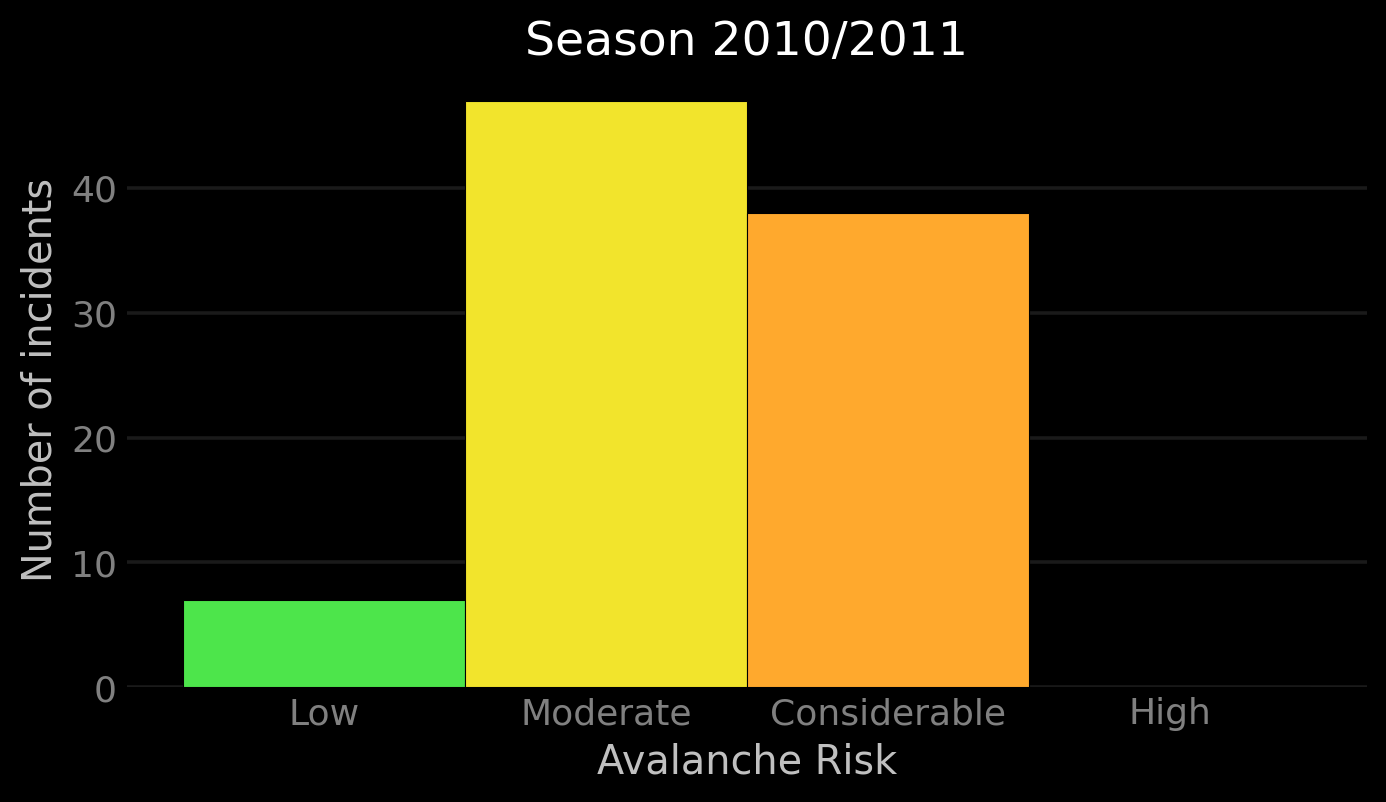

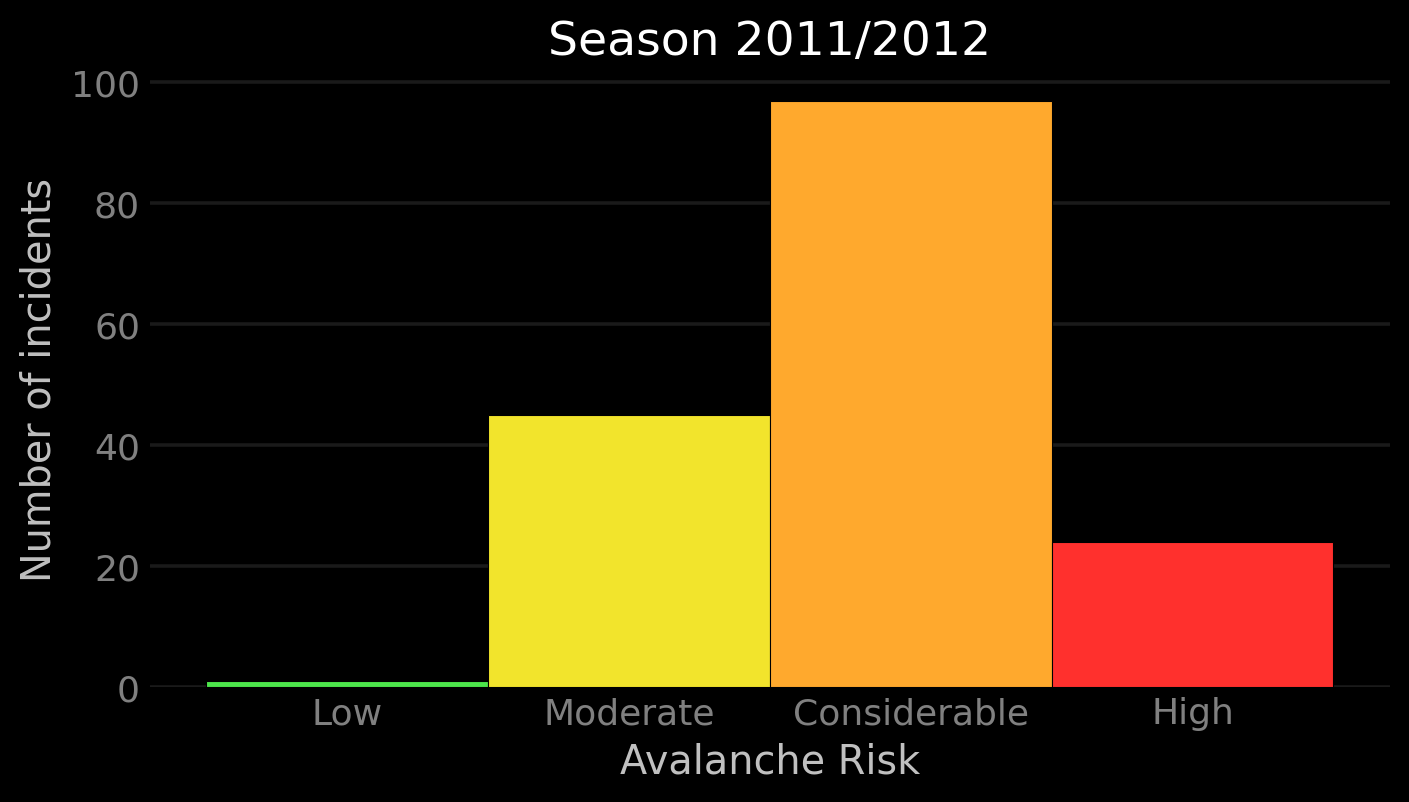

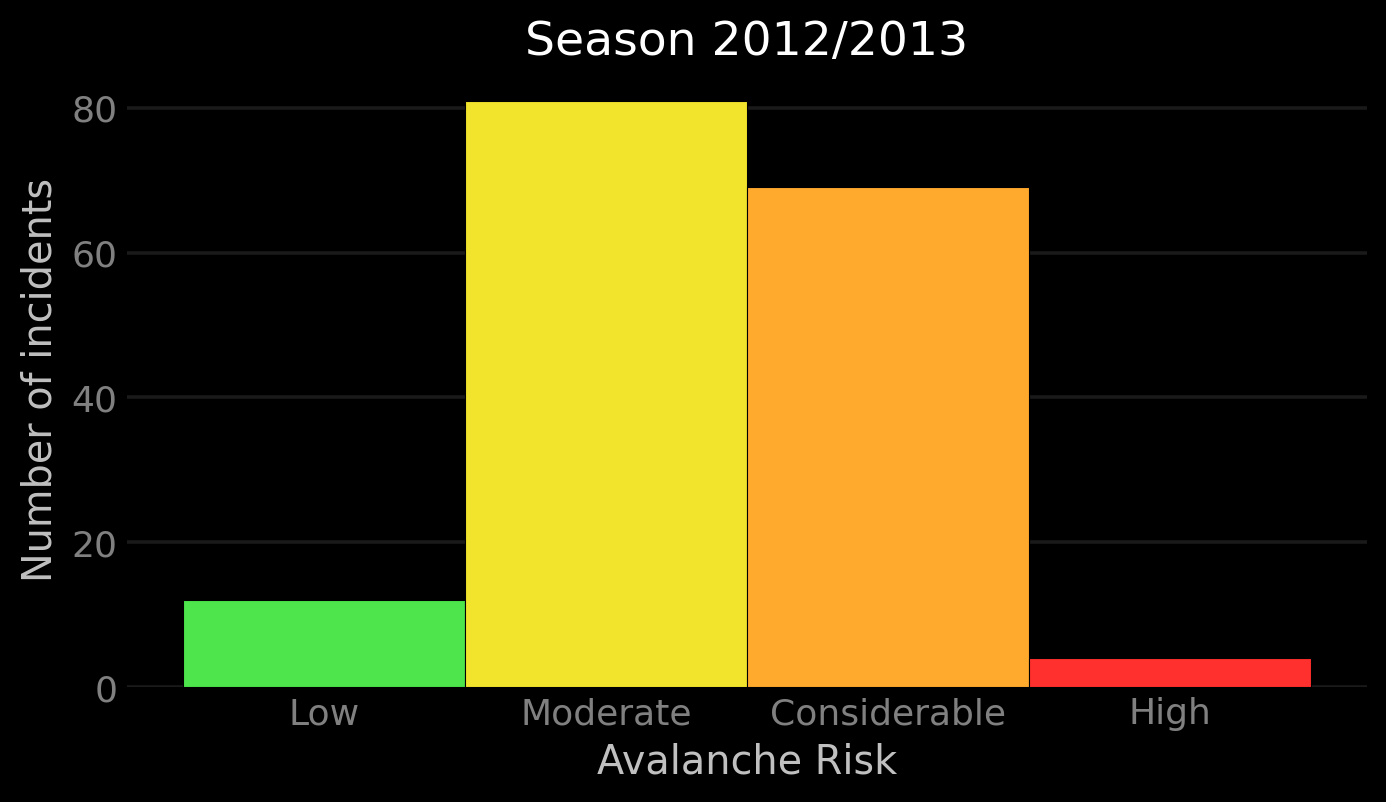

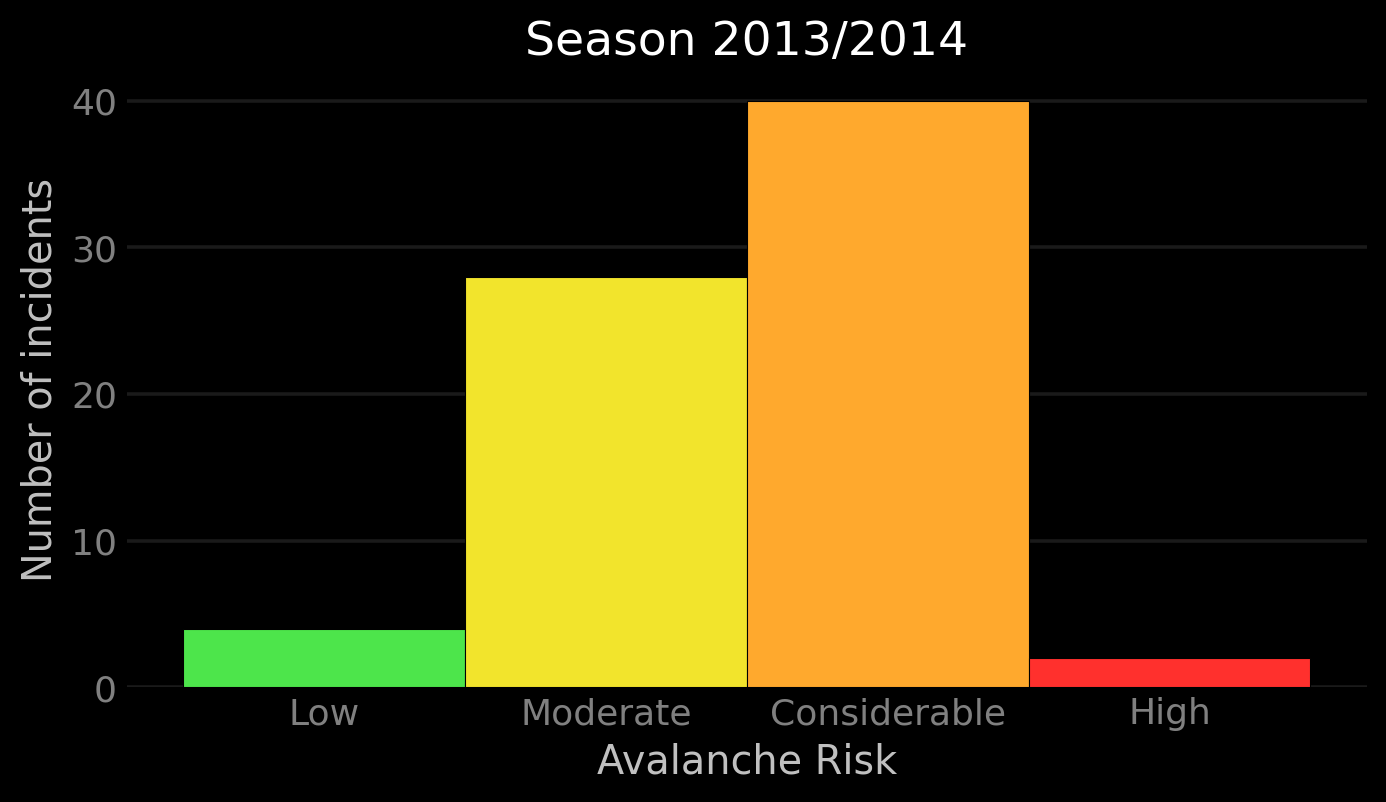

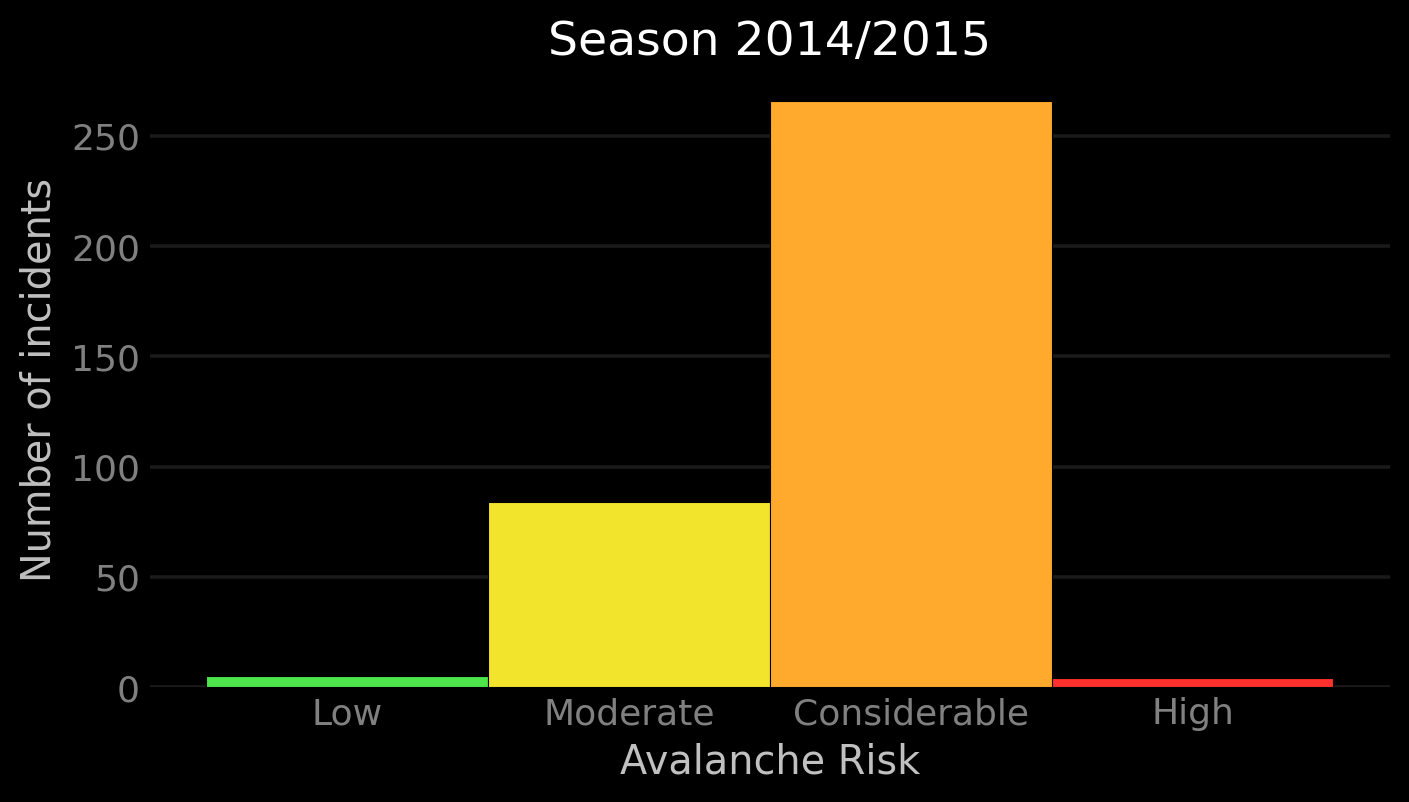

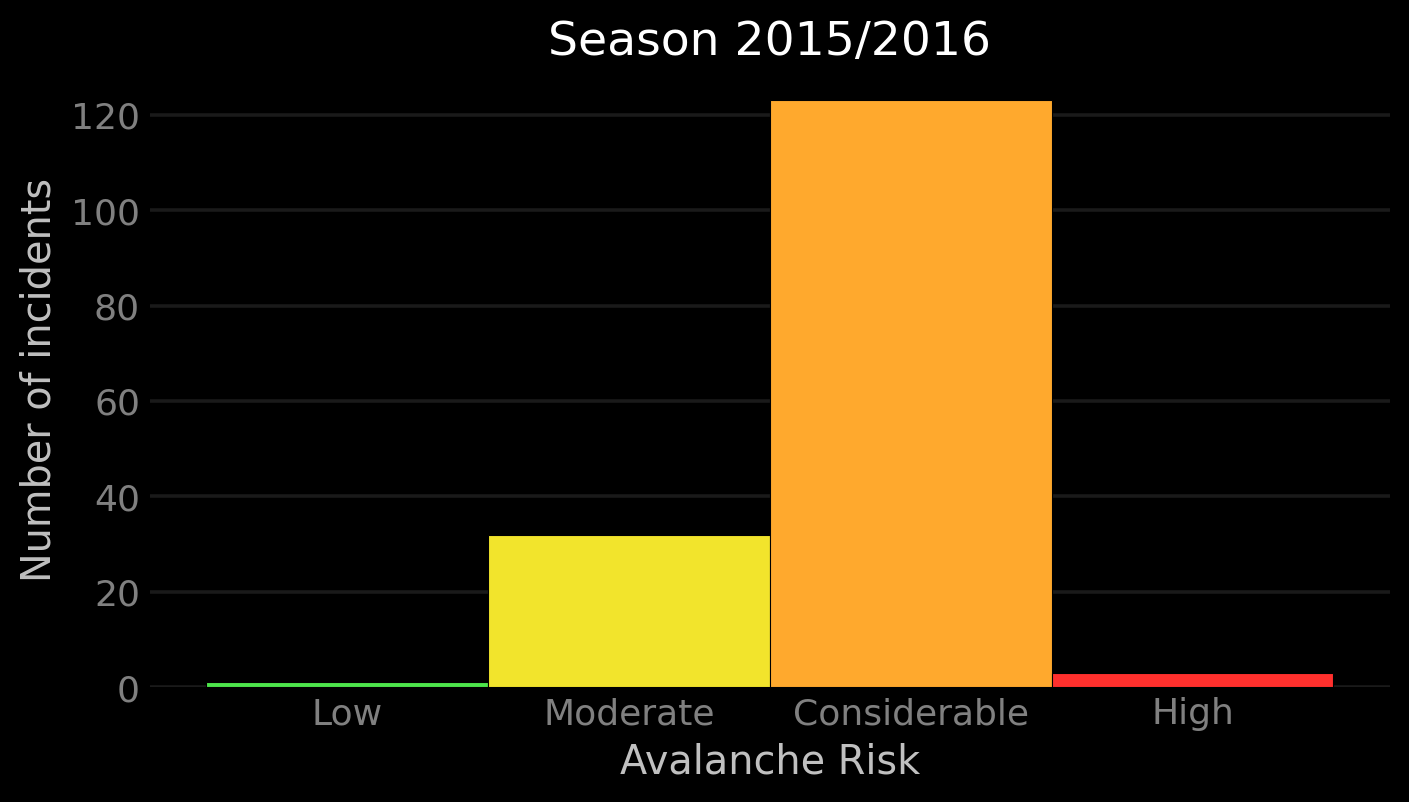

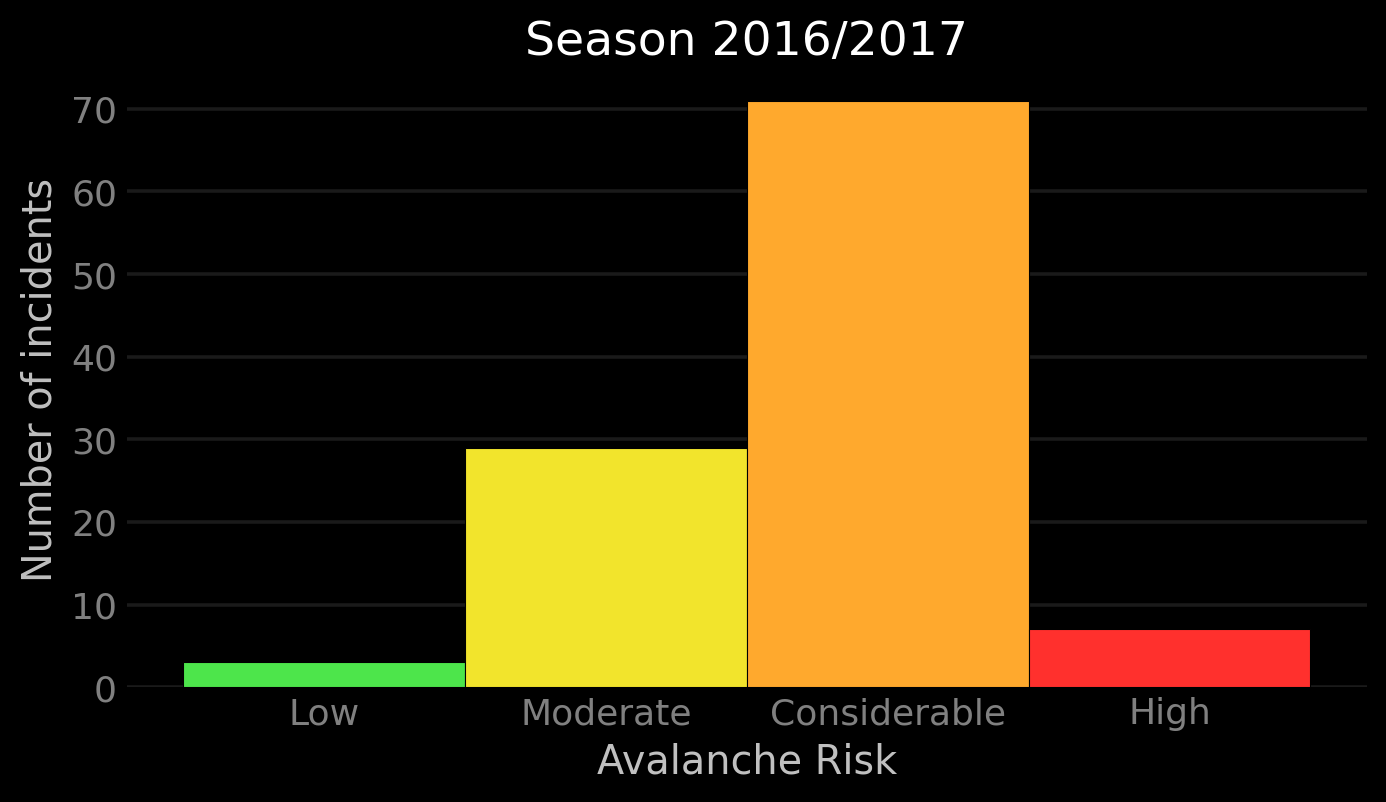

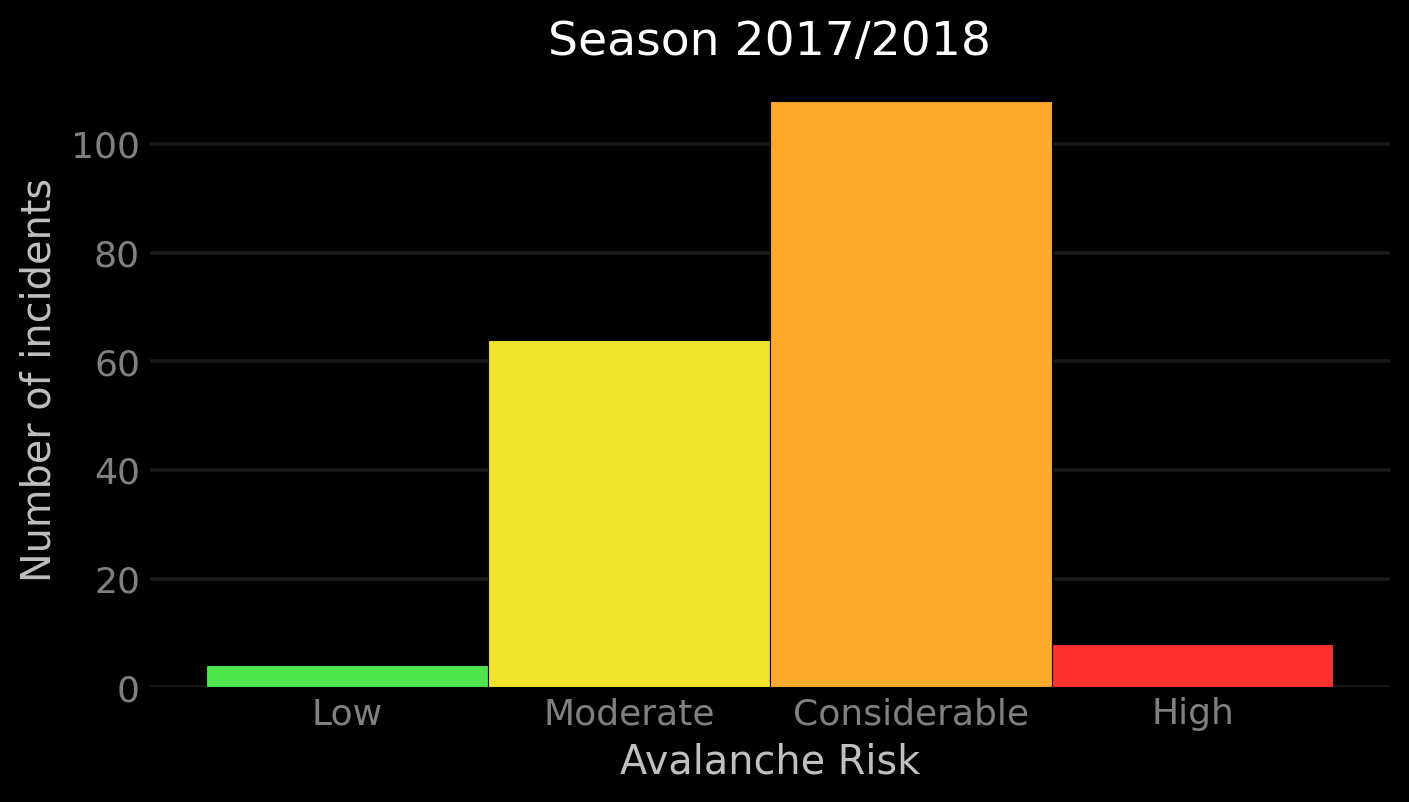

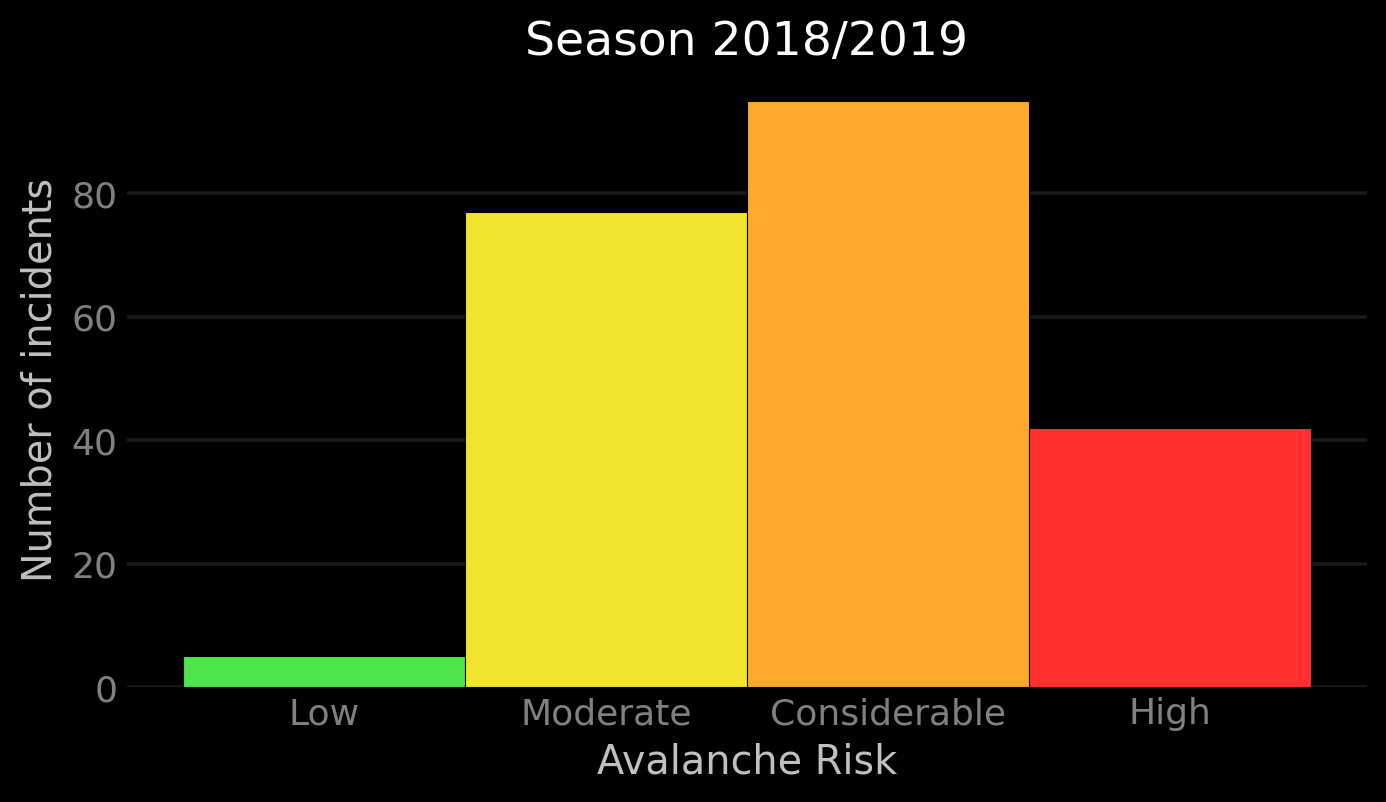

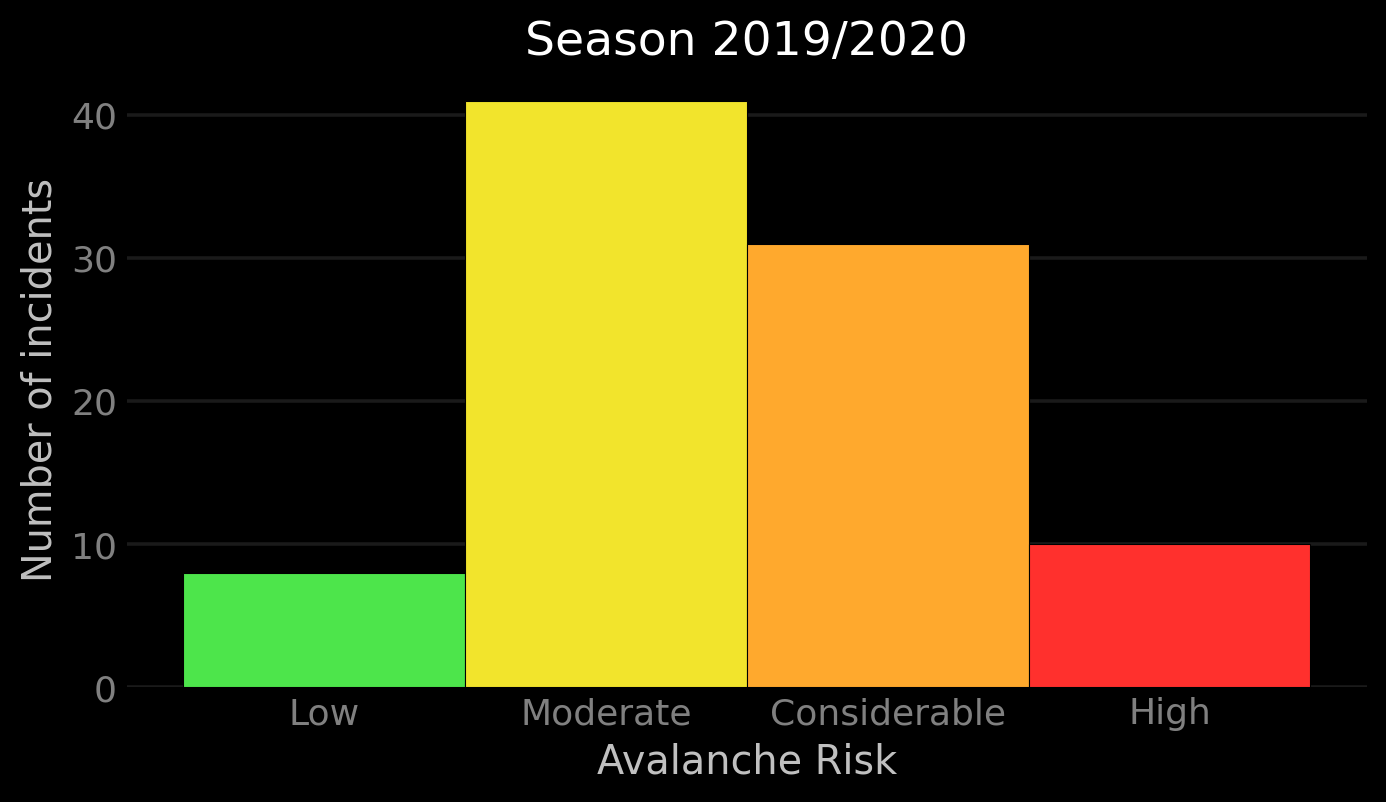

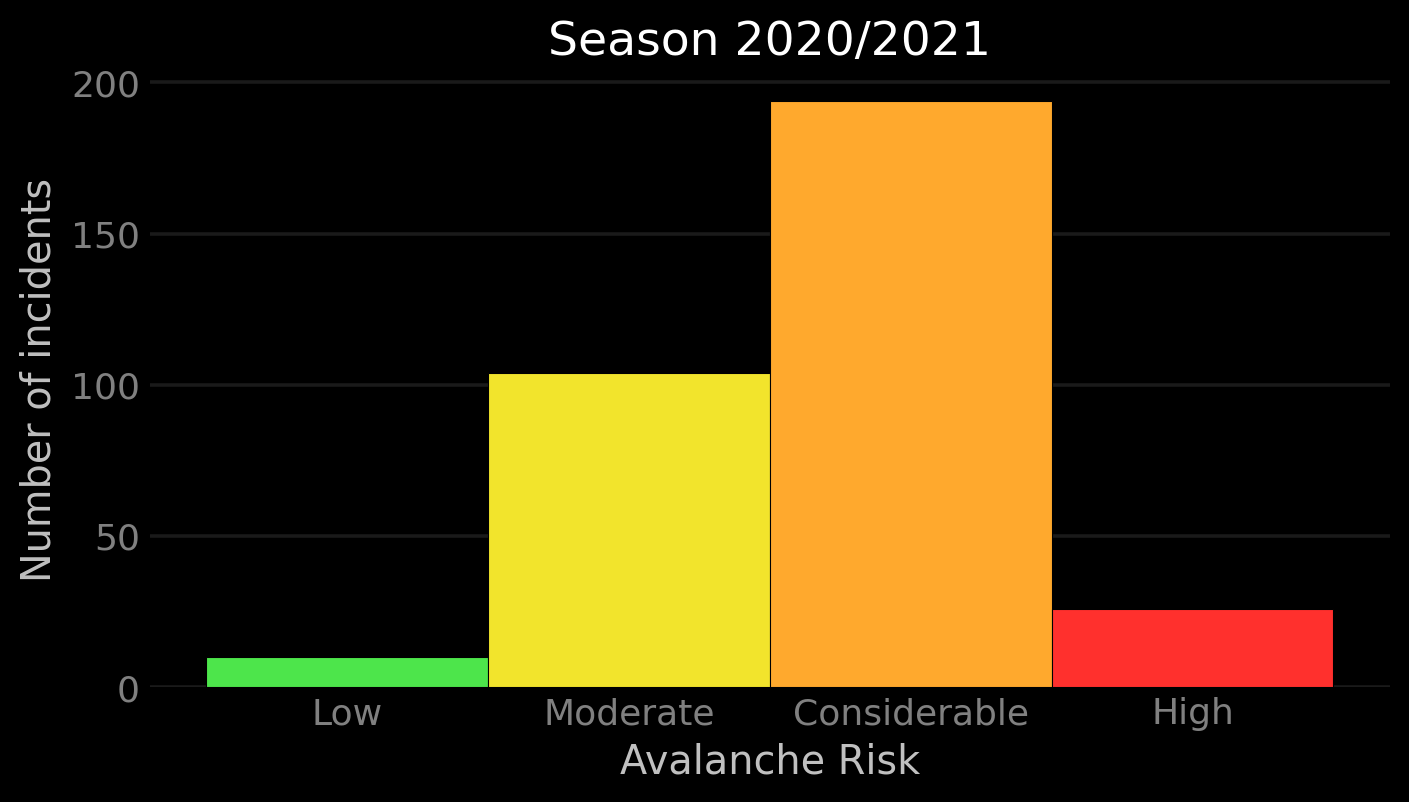

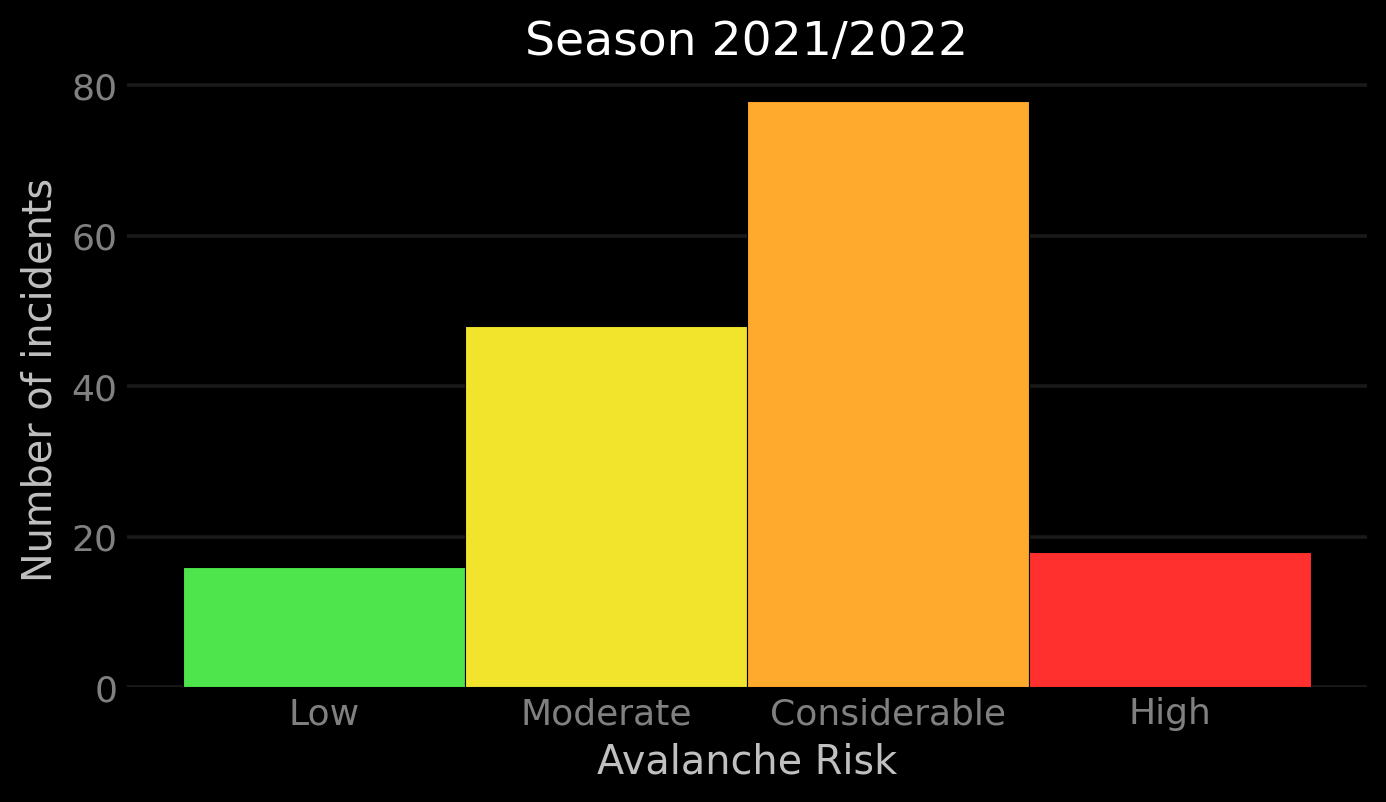

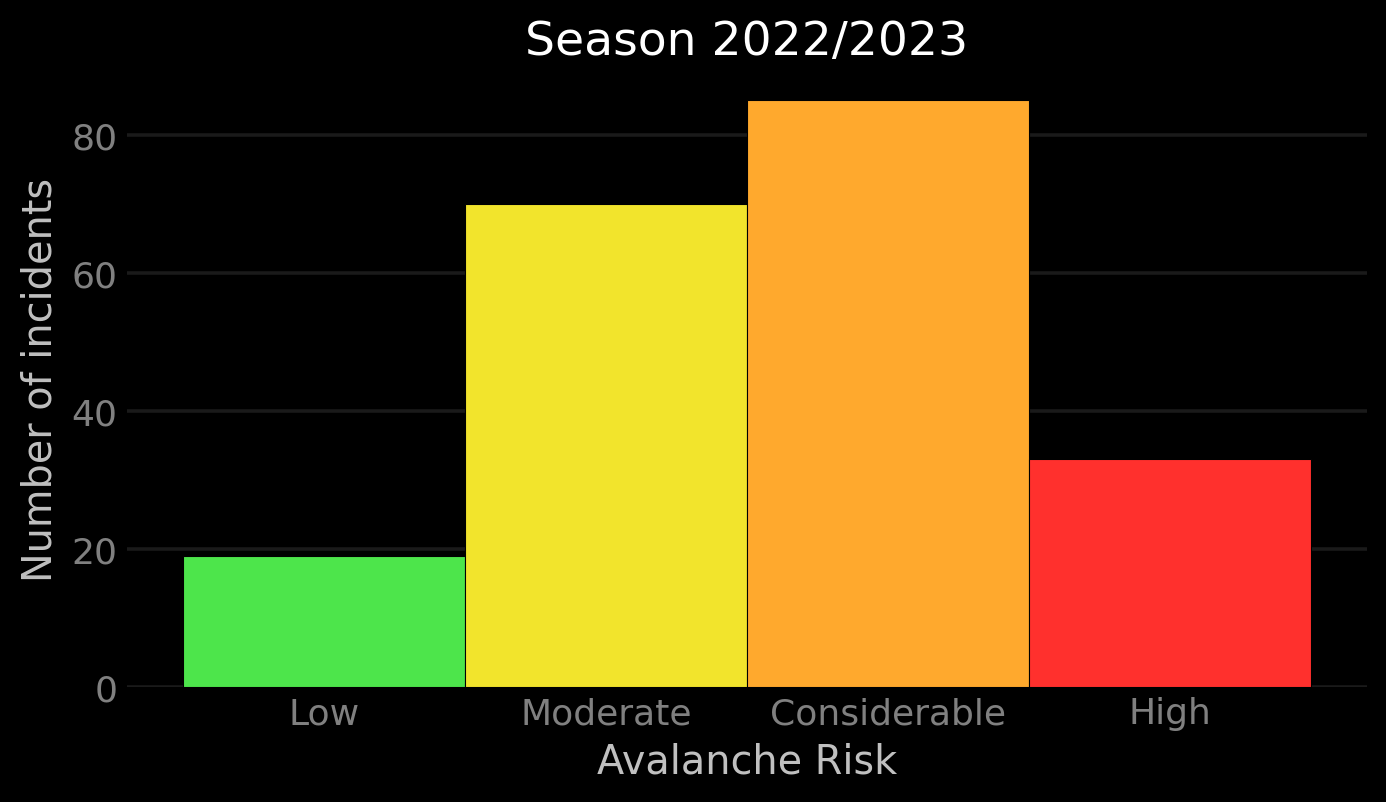

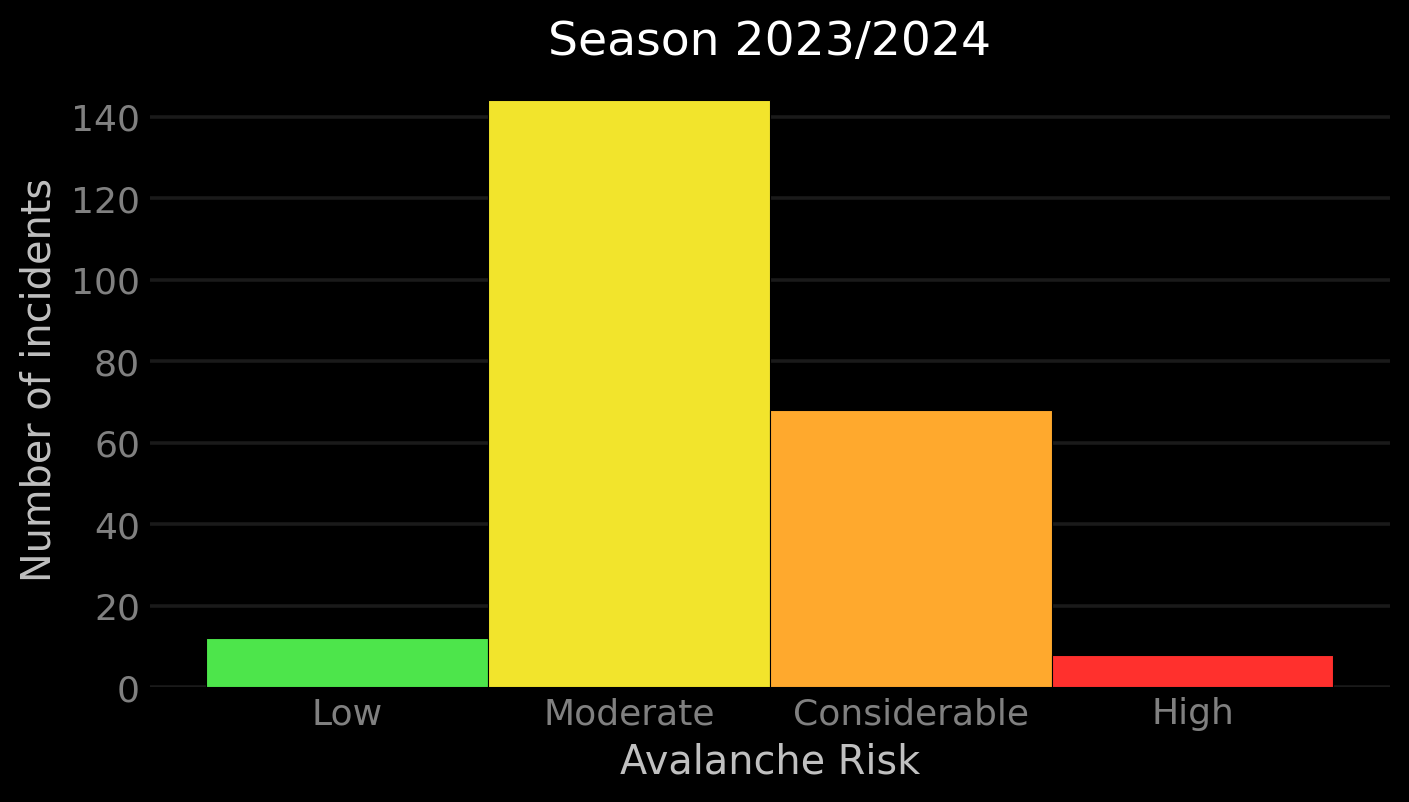

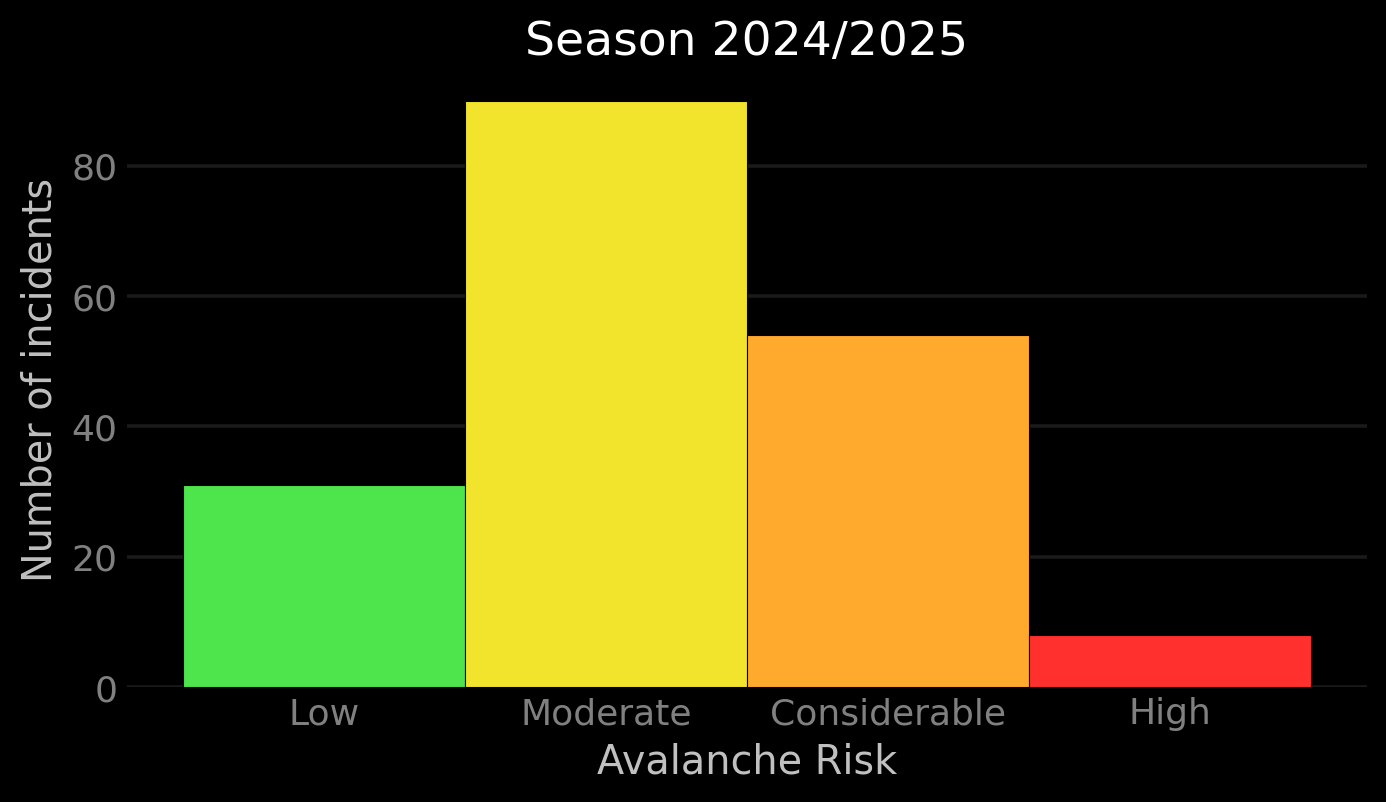

In [79]:
for season in range(2010, 2025):
    df_year = df[(df.date >= f"{season}-09-01") & (df.date < f"{season + 1}-09-01")]
    fig, ax = plt.subplots()
    counts, bins, patches = ax.hist(df_year.danger_id[(df_year.danger_id < 6)],bins=[v - .5 for v in range(1, 6)], edgecolor='black', density=False)
    ax.set(title=f"Season {season}/{season + 1}", xlabel='Avalanche Risk', ylabel='Number of incidents', xticks=range(1, 5), xticklabels=['Low', 'Moderate', 'Considerable', 'High'])
    for patch, color in zip(patches, colors):
        patch.set_facecolor(color)

In [76]:
"{season}-09-01"

'{season}-09-01'

In [45]:
df

,id,date,dead,injured,uninjured,sweeped,buried_partial,buried_total,ascent_descent,danger_id,...,slab_height,avalanche_type,size,release,humidity,elevation,longitude,latitude,slope_angle,aspect
0,10000,2021-01-15T08:58:00+01:00,0,0,0,0,0,0,ascent,3,...,100,slab,1: small avalanche,unknown,dry,2025.0,14.32961,47.26257,30.0,4.0
1,10001,2021-01-14T14:30:00+01:00,0,1,1,2,1,1,ascent,3,...,None,slab,unknown,NaN,unknown,1580.0,14.28506,47.64233,30.0,8.0
2,10002,2021-01-15T12:00:00+01:00,0,0,0,0,0,0,descent,3,...,None,slab,unknown,artificial,NaN,1700.0,14.82266,47.48985,35.0,2.0
3,10003,2021-01-15T11:00:00+01:00,0,0,0,0,0,0,unknown,3,...,None,slab,unknown,artificial,dry,1900.0,14.85188,47.48853,30.0,8.0
4,10004,2021-01-15T12:00:00+01:00,0,0,2,2,0,2,ascent,3,...,50,slab,1: small avalanche,artificial,dry,2190.0,20.21776,49.18796,39.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,9988,2020-12-31T11:28:00+01:00,0,0,0,0,0,0,descent,3,...,10,slab,1: small avalanche,artificial,dry,2056.0,13.47404,47.23459,33.0,8.0
4374,9989,2021-01-11T14:00:00+01:00,0,0,1,0,0,0,unknown,2,...,None,slab,2: medium avalanche,artificial,dry,3100.0,11.63086,47.02469,35.0,4.0
4375,9996,2021-01-15T10:58:00+01:00,0,0,1,0,0,0,descent,4,...,70,slab,2: medium avalanche,artificial,dry,2000.0,11.28543,47.19600,38.0,3.0
4376,9997,2021-01-15T13:40:00+01:00,1,1,0,0,0,0,NaN,3,...,None,slab,3: large avalanche,artificial,dry,2150.0,14.15511,47.23573,35.0,3.0
